# Car of the Year Analysis - Winners & Nominees

**Car of the Year is one of the most prestigious award for car manufacturers that produce and sell cars in Europe continent.**

The dataset contains all manufacturer-model names (in places), as well as the points earned, starting from year 1964, up to the present.

If you're ready for the analyses, let's load the necessary modules and the dataset first:

In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
coty_win_nom = pd.read_csv('carOfTheYear_winners_nominees.csv', index_col=0)

These are the features (columns) to be used. You will see later why there are up 10 places included:

In [4]:
coty_win_nom.columns

Index(['Winner', 'W_Pts', '2nd Place', '2P_Pts', '3rd Place', '3P_Pts',
       '4th Place', '4P_Pts', '5th Place', '5P_Pts', '6th Place', '6P_Pts',
       '7th Place', '7P_Pts', '8th Place', '8P_Pts', '9th Place', '9P_Pts',
       '10th Place', '10P_Pts'],
      dtype='object')

First of all, let's see the winners between **2010** and **2020**:

In [5]:
coty_win_nom.loc[2020:2010,['Winner', 'W_Pts']]

,Winner,W_Pts
Year,,
2020,Peugeot 208,281
2019,Jaguar I-Pace,250
2018,Volvo XC40,325
2017,Peugeot 3008,319
2016,Opel/Vauxhall Astra,312
2015,Volkswagen Passat,340
2014,Peugeot 308,307
2013,Volkswagen Golf,414
2012,Opel Ampera/Chevrolet Volt,330


While inspecting the winners, I asked myself that whether or not there are manufacturer(s) that won the award **more than once** with the same model. Does there exist any such cars?

In [6]:
winner_manu_model_cnt = coty_win_nom['Winner'].value_counts()
winner_manu_model_cnt[winner_manu_model_cnt > 1]

Volkswagen Golf    2
Renault Clio       2
Name: Winner, dtype: int64

Yes! Two cars, **Wolkswagen Golf** and **Renault Clio**. But, in which years?

In [7]:
double_winners = winner_manu_model_cnt[winner_manu_model_cnt > 1].index
double_winners_years = {}
for i in range(2020,1963,-1):
    winner_car = coty_win_nom.loc[i, 'Winner']
    if winner_car in double_winners:
        if winner_car in double_winners_years.keys():
            double_winners_years[winner_car].append(i)
        else:
            double_winners_years[winner_car] = [i]
double_winners_years

{'Volkswagen Golf': [2013, 1992], 'Renault Clio': [2006, 1991]}

That's more like it! Volkswagen Golf won it with **Mk7** chassis in 2013, and **Mk3** in 1992. Likewise, the **3rd** and **1st generation** of Renault Clio also achieved it in 2006 and 1991, respectively.

In a broader approach, now let's see which unique manufacturers have won the award **at least once** in all CotY organizations, and count how many for each. However, some necessary interventions were required to finalize it. Here are the reasons:

* In 2012, **Chevrolet** has won with the model **Volt**, which is exactly the same model as **Opel Ampera**. Due to its name coming later in the corresponding field, I've got to manually add afterwards to make it fair. Well, it's the only year the American manufacturer got this award.

* The Italian manufacturer, **Alfa Romeo** should not be called just as **Alfa**; that's why the name is updated to reflect the way it should be.

* Be aware that **Opel** and **Opel/Vauxhall** are the same ones. So, it's better to combine them while counting their wins.

In [23]:
winners_split = coty_win_nom['Winner'].str.split()
winners_manu_cnt = {}
for i in range(2020,1963,-1):
    winner_manu = winners_split[i][0]
    if winner_manu in winners_manu_cnt.keys():
        winners_manu_cnt[winner_manu] += 1
    else:
        winners_manu_cnt[winner_manu] = 1
# Necessary interventions
winners_manu_cnt['Chevrolet'] = 1
winners_manu_cnt['Alfa Romeo'] = winners_manu_cnt['Alfa']
del(winners_manu_cnt['Alfa'])
winners_manu_cnt['Opel'] += winners_manu_cnt['Opel/Vauxhall']
del winners_manu_cnt['Opel/Vauxhall']
print("{} different manufacturers have won the CotY award so far.".format(len(winners_manu_cnt)))

22 different manufacturers have won the CotY award so far.


A **bar chart** could be useful to easily see the counts for all winners. Well, which one has got the most wins?

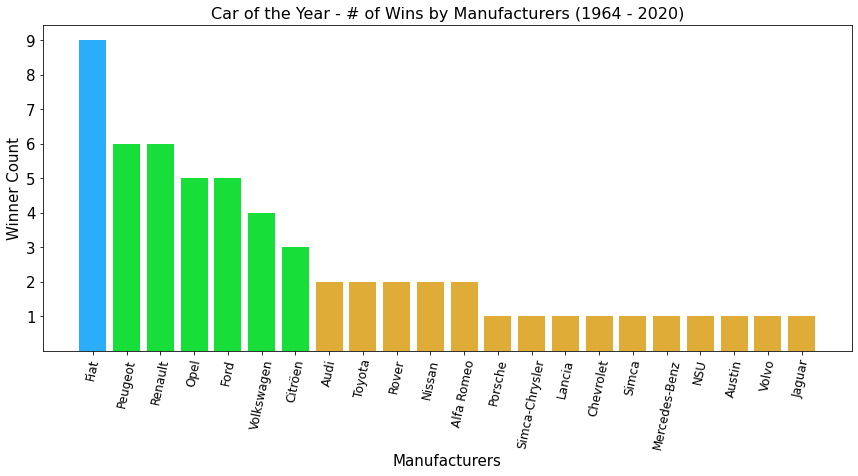

In [9]:
winners_manu_df = pd.Series(winners_manu_cnt, index=winners_manu_cnt.keys()).sort_values(ascending=False)
colors = []
for i in range(len(winners_manu_df)):
    if winners_manu_df[i] > 6:    colors.append('#2aaefa')
    elif winners_manu_df[i] > 2:  colors.append('#18de39')
    else:    colors.append('#deac37')
plt.figure(figsize=(14.5,6))
plt.bar(winners_manu_df.index, winners_manu_df, color=colors)
plt.title("Car of the Year - # of Wins by Manufacturers (1964 - 2020)", fontsize=16)
plt.xlabel('Manufacturers', fontsize=15)
plt.ylabel('Winner Count', fontsize=15)
plt.xticks(rotation=78, fontsize=12)
plt.yticks(range(1,10), range(1,10), fontsize=15)
plt.show()

Wow! It's **Fiat** which achieved this a total of **9** times! Right then, let's reveal which models have reached the top in their respective years:

In [10]:
coty_win_nom[coty_win_nom['Winner'].str.contains('Fiat')][['Winner', 'W_Pts']]

,Winner,W_Pts
Year,,
2008,Fiat 500,385
2004,Fiat Panda,281
1996,Fiat Bravo/Brava,378
1995,Fiat Punto,370
1989,Fiat Tipo,356
1984,Fiat Uno,346
1972,Fiat 127,239
1970,Fiat 128,235
1967,Fiat 124,144


This clearly shows that Fiat is still seeking another win for more than 10 years!

Beyond that, I'd like to see the top 3 of which models have earned **the most points** among the winners:

In [11]:
coty_win_nom[['Winner','W_Pts']].sort_values('W_Pts', ascending=False).head(3)

,Winner,W_Pts
Year,,
1988,Peugeot 405,464
1998,Alfa Romeo 156,454
1999,Ford Focus,444


Oh, it's **Peugeot 405** with the most points earned, and still holding the record since 1988!

In contrast, the top 3 of the winners with **the least points** earned are:

In [12]:
coty_win_nom[['Winner','W_Pts']].sort_values('W_Pts').head(3)

,Winner,W_Pts
Year,,
1964,Rover 2000,76
1965,Austin 1800,78
1966,Renault 16,98


Ah, the **first three years** of CotY! Perhaps, that's because there were less cars nominated in the 60s, similarly much less juries attended to vote for.

Now another aspect: let's show the winners with **the least point gaps** against the runner-ups (i.e. 2nd place):

In [13]:
coty_win_nom['Won By'] = coty_win_nom['W_Pts'] - coty_win_nom['2P_Pts']
coty_win_nom.sort_values('Won By')[['Winner', 'W_Pts', '2nd Place', '2P_Pts', 'Won By']].head(3)

,Winner,W_Pts,2nd Place,2P_Pts,Won By
Year,,,,,
2019,Jaguar I-Pace,250,Alpine A110,250,0
2009,Opel/Vauxhall Insignia,321,Ford Fiesta,320,1
2007,Ford S-Max,235,Opel/Vauxhall Corsa,233,2


Whoa! Can you believe this? **Jaguar I-Pace** and the new generation of **Alpine A110** have both earned the same points in 2019! The juries had chosen the former car to crown for the win. Moreover, I couldn't find any specific reasons why Alpine A110 stayed in 2nd. The only statement I found in the CotY website was:

_The enjoyable Alpine A110, with the same amount of points, has also flown well over its affordability and seating limitation._

Maybe, we should read the juries' comments on both cars for a better understanding.

Remarkably, the years **2009** and **2007** have seen the big competitions at the scene, almost head-to-head!

On the other hand, let's see the winners that achieved with **the most point gaps**:

In [14]:
coty_win_nom.sort_values('Won By', ascending=False)[['Winner', 'W_Pts', '2nd Place', '2P_Pts', 'Won By']].head(3)

,Winner,W_Pts,2nd Place,2P_Pts,Won By
Year,,,,,
2013,Volkswagen Golf,414,Subaru BRZ/Toyota GT86,202,212
1988,Peugeot 405,464,Citröen AX,252,212
1998,Alfa Romeo 156,454,Volkswagen Golf,266,188


Ah! It's **Volkswagen Golf** and **Peugeot 405** again with this great dominations, an astounding gap of **212** points!

Now, another important analysis; this time let's count **the total number of nominations** for all manufacturers that appeared in CotY's all times.

_For this purpose, it's convenient to separate both the manufacturer-model names and their points earned in different Series._

In [15]:
coty_all_nominees = coty_win_nom[['Winner', '2nd Place', '3rd Place', '4th Place', '5th Place',
                                 '6th Place', '7th Place', '8th Place', '9th Place', '10th Place']].fillna('N/A')
coty_all_points = coty_win_nom[['W_Pts', '2P_Pts', '3P_Pts', '4P_Pts', '5P_Pts',
                                 '6P_Pts', '7P_Pts', '8P_Pts', '9P_Pts', '10P_Pts']].fillna(0)
all_manu_nominees_cnt = {}
all_manu_points = {}
for i in range(2020,1963,-1):
    nominees = coty_all_nominees.loc[i].values
    points = coty_all_points.loc[i].values
    for j in range(len(nominees)):
        if nominees[j] == 'N/A':   continue
        manu = nominees[j].split()[0]
        if nominees[j].split()[0] not in all_manu_nominees_cnt.keys():
            all_manu_nominees_cnt[manu] = 1
            all_manu_points[manu] = points[j]
        else:
            all_manu_nominees_cnt[manu] += 1
            all_manu_points[manu] += points[j]
all_manu_nominees_cnt['Rolls Royce'] = all_manu_nominees_cnt.pop('Rolls')
all_manu_points['Rolls Royce'] = all_manu_points.pop('Rolls')
all_manu_nominees_cnt['Alfa Romeo'] = all_manu_nominees_cnt.pop('Alfa')
all_manu_points['Alfa Romeo'] = all_manu_points.pop('Alfa')
all_manu_nominees_cnt['Range Rover'] = all_manu_nominees_cnt.pop('Range')
all_manu_points['Range Rover'] = all_manu_points.pop('Range')

Again, it's necessary to rename some manufacturers to their original double-worded ones.

OK, let's pay attention to the visualization below:

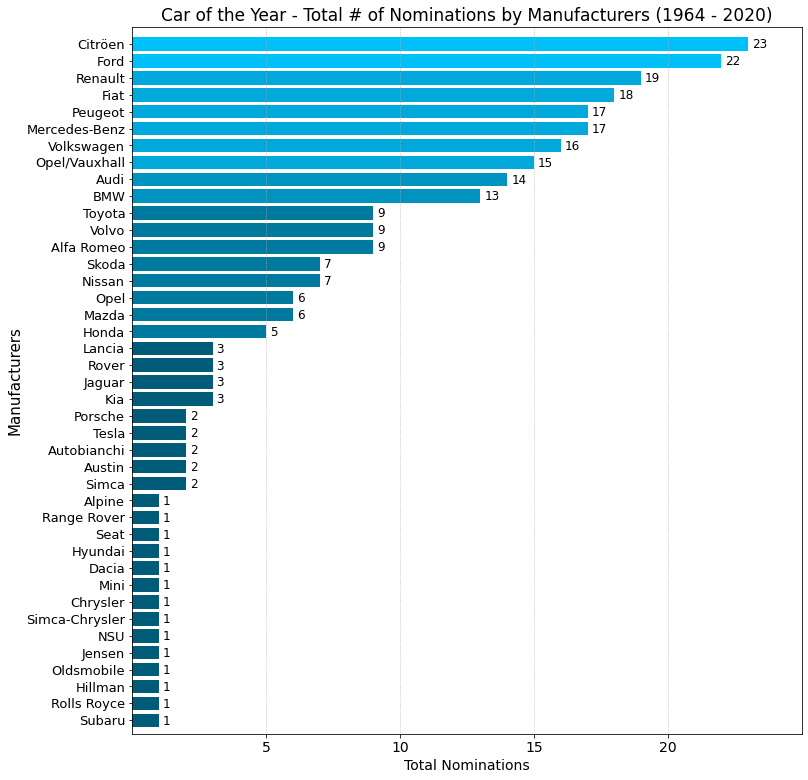

In [16]:
all_manu_nominees_sr = pd.Series(all_manu_nominees_cnt, index=all_manu_nominees_cnt.keys()).sort_values()
colors = []
for v in all_manu_nominees_sr:
    if v >= 20:      colors.append('#00c0fa')
    elif v >= 15:    colors.append('#00a8db')
    elif v >= 10:    colors.append('#0093bf')
    elif v >= 5:     colors.append('#00799e')
    else:            colors.append('#005c78')
plt.figure(figsize=(12,13))
plt.barh(all_manu_nominees_sr.index, all_manu_nominees_sr, color=colors)
plt.axis([0,25,-0.8,len(all_manu_nominees_sr)])
plt.title('Car of the Year - Total # of Nominations by Manufacturers (1964 - 2020)', fontsize=17)
for i in range(len(all_manu_nominees_sr)):
    plt.text(all_manu_nominees_sr[i]+0.15,i-0.25,all_manu_nominees_sr[i], fontsize=12)
plt.xlabel('Total Nominations', fontsize=14)
plt.ylabel('Manufacturers', fontsize=15)
plt.xticks([5,10,15,20], [5,10,15,20], fontsize=14)
plt.yticks(fontsize=13)
plt.grid(axis='x', linestyle=':')
plt.show()

Wow! It's **Citröen** that has been nominated **23** times in total, the most of all times! Then, **Ford** comes after with **22** nominations. By the way, one can realize that **Opel** and **Opel/Vauxhall** have appeared in the nominations a total of **21** times, although I did not combine them here.

But, what makes me surprised is that several well-known manufacturers had **only 1** nomination in CotY, such as **Range Rover**, **Seat**, **Hyundai**, **Dacia**, **Mini**, **Rolls Royce**, **Subaru**. And, even no **Mitsubishi** at all!

Now, moving to similar aspect, the next visualization is for **summing up all points** for the manufacturers by considering all their nominated models:

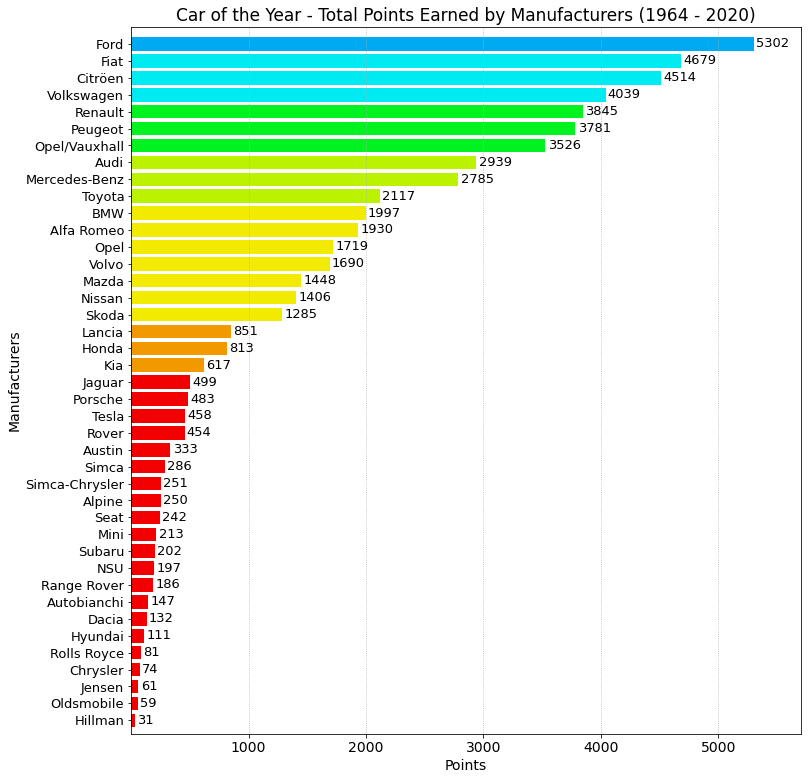

In [17]:
all_manu_points_sr = pd.Series(all_manu_points, index=all_manu_points.keys()).sort_values()
colors = []
for v in all_manu_points_sr:
    if v >= 5000:     colors.append('#00aaf2')
    elif v >= 4000:   colors.append('#00eaf2')
    elif v >= 3000:   colors.append('#00f220')
    elif v >= 2000:   colors.append('#baf200')
    elif v >= 1000:   colors.append('#f2ea00')
    elif v >= 500:    colors.append('#f29900')
    else:             colors.append('#f20000')
plt.figure(figsize=(12,13))
plt.barh(all_manu_points_sr.index, all_manu_points_sr, color=colors)
plt.axis([0,all_manu_points_sr.max()+400,-0.8,len(all_manu_points_sr)])
for i in range(len(all_manu_points_sr)):
    plt.text(all_manu_points_sr.iloc[i]+20,i-0.2,int(all_manu_points_sr.iloc[i]), fontsize=13)
plt.title('Car of the Year - Total Points Earned by Manufacturers (1964 - 2020)', fontsize=17)
plt.xlabel('Points', fontsize=14)
plt.ylabel('Manufacturers', fontsize=14)
plt.xticks([1000,2000,3000,4000,5000],[1000,2000,3000,4000,5000],fontsize=14)
plt.yticks(fontsize=13)
plt.grid(axis='x', linestyle=':')
plt.show()

Ah! **Ford** has accumulated the most points in CotY history, amassing **more than 5000** points! **Fiat**, the manufacturer with the most wins, comes in second place. Later, the French car maker **Citröen** which is praised for having the most nominations.

Of course, when combined, **Opel** and **Opel/Vauxhall** together would have been in 2nd place, another manufacturer that could surpass 5000 points.

We've got the nomination counts and total points; now we are able to get **the average points earned per nominated model** for each manufacturer, and print the top 10. Will there be something unfamiliar?

_For this analysis, I've decided to exclude the manufacturers with a single nomination, in advance._

In [18]:
all_manu_nom_pts = pd.concat([all_manu_nominees_sr, all_manu_points_sr], axis=1, keys=['Nominated', 'Points'])
all_manu_nom_pts['Average Pts'] = round(all_manu_nom_pts['Points'] / all_manu_nom_pts['Nominated'], 2)
single_nom = []
for i in range(len(all_manu_nom_pts)):
    if all_manu_nom_pts.iloc[i,0] == 1:
        single_nom.append(all_manu_nom_pts.index[i])
all_manu_nom_pts.drop(index=single_nom, inplace=True)
all_manu_nom_pts.sort_values('Average Pts', ascending=False).head(10)

,Nominated,Points,Average Pts
Opel,6,1719.0,286.50
Lancia,3,851.0,283.67
Fiat,18,4679.0,259.94
Volkswagen,16,4039.0,252.44
Porsche,2,483.0,241.50
Mazda,6,1448.0,241.33
Ford,22,5302.0,241.00
Toyota,9,2117.0,235.22
Opel/Vauxhall,15,3526.0,235.07
Tesla,2,458.0,229.00


Oh, it's **Opel** which potentially had the most average points per nomination! **Fiat** with 18 nominees is in the 3rd place. Interestingly, the sports car maker **Porsche** and the electric one, **Tesla** have made it to the list!

If you wonder the placement when **Opel** and **Opel/Vauxhall** were merged, the average point would be:

In [19]:
opel_pts = all_manu_nom_pts.loc['Opel','Points'] + all_manu_nom_pts.loc['Opel/Vauxhall','Points']
opel_nom = all_manu_nom_pts.loc['Opel','Nominated'] + all_manu_nom_pts.loc['Opel/Vauxhall','Nominated']
print('Average point for Opel when combined: {:.2f}'.format(opel_pts / opel_nom))

Average point for Opel when combined: 249.76


Surely, that could put them in the **4th** place.

How about **Citröen** as we did not see the French company in the list?

In [20]:
all_manu_nom_pts.loc['Citröen']

Nominated        23.00
Points         4514.00
Average Pts     196.26
Name: Citröen, dtype: float64

Now, let's go to a specific exploration: **Car of the Year 2001**

It's the only year that there were up to **10** nominees participated for winning the award. And, that's the reason why the related dataset was extended to hold at most ten places. Anyway, let's visualize for how it was resulted:

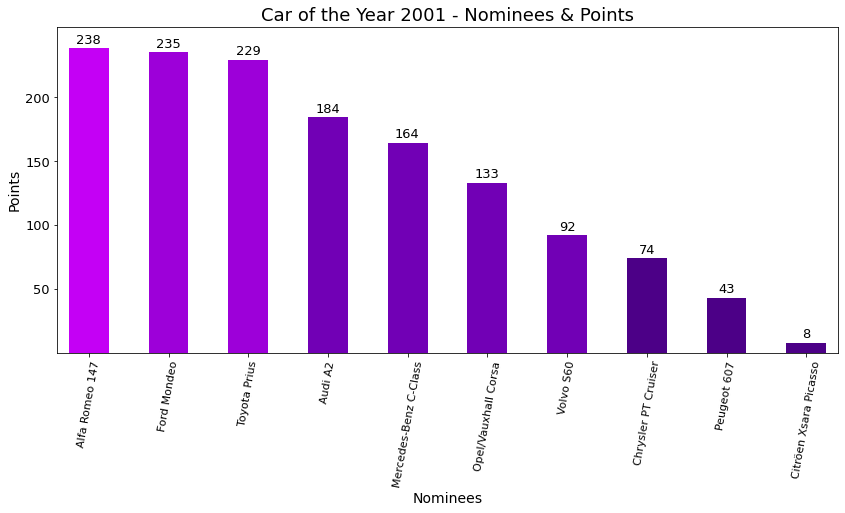

In [21]:
plt.figure(figsize=(14,6))
colors = []
for i in range(1,20,2):
    if i < 2:    colors.append('#c400f5')
    elif i < 6:  colors.append('#9d00d9')
    elif i < 14: colors.append('#7100b5')
    else:        colors.append('#4c0087')
plt.bar(coty_win_nom.iloc[19,range(0,20,2)], coty_win_nom.iloc[19,range(1,20,2)], width=0.5, color=colors)
plt.axis([-0.4,9.4,0,255])
for i in range(1,20,2):
    pt = coty_win_nom.iloc[19,i]
    if  pt >= 100:   plt.text((i/2)-0.66,pt+4,int(pt), fontsize=13)
    elif pt >= 10:   plt.text((i/2)-0.6,pt+4,int(pt), fontsize=13) 
    else:            plt.text((i/2)-0.55,pt+4,int(pt), fontsize=13)
plt.title('Car of the Year 2001 - Nominees & Points', fontsize=18)
plt.xlabel('Nominees', fontsize=14)
plt.ylabel('Points', fontsize=14)
plt.xticks(fontsize=11, rotation=80)
plt.yticks([50,100,150,200],[50,100,150,200],fontsize=13)
plt.show()

In that year, **Alfa Romeo 147** had breasted the rope to take the win with **238** points. In contrast, it's the year **Citröen** does not want to remember; its MPV-class model **Xsara Picasso** only scored **8** points, not even a double digit! That's the lowest in the CotY history, unfortunately.

_Did you wonder what Citröen Xsara Picasso looked like? Don't forget to Google it._

In the last visualization, let's observe **the points in each place** for CotY's last 5 years.

Frankly, the **bar chart** below tells you everything what's in mind. I'll leave the interpretation to you...

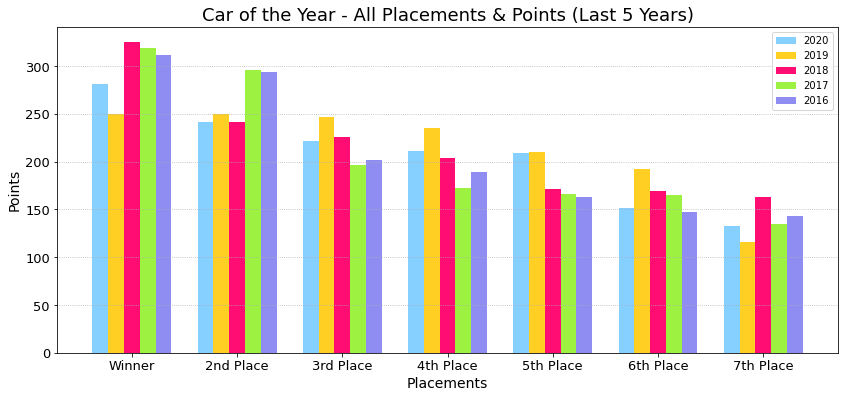

In [22]:
pos = np.array(range(7))
plt.figure(figsize=(14,6))
plt.bar(pos-0.3, coty_win_nom.iloc[0,range(1,14,2)], width=0.15, label='2020', color='#85d0ff')
plt.bar(pos-0.15, coty_win_nom.iloc[1,range(1,14,2)], width=0.15, label='2019', color='#ffcf24')
plt.bar(pos, coty_win_nom.iloc[2,range(1,14,2)], width=0.15, label='2018', color='#ff0d72')
plt.bar(pos+0.15, coty_win_nom.iloc[3,range(1,14,2)], width=0.15, label='2017', color='#9df241')
plt.bar(pos+0.3, coty_win_nom.iloc[4,range(1,14,2)], width=0.15, label='2016', color='#908df2')
plt.title('Car of the Year - All Placements & Points (Last 5 Years)',fontsize=18)
plt.xlabel('Placements',fontsize=14)
plt.ylabel('Points',fontsize=14)
plt.xticks(range(7),['Winner','2nd Place','3rd Place','4th Place','5th Place','6th Place','7th Place'],fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y', linestyle=':')
plt.legend()
plt.show()

### That's it, everyone! We've come to end of the analyses of Car of the Year.

### Thank you for joining me; hope you learned many things from these outcomes and visualizations!